In [1]:
from qiskit import *
%matplotlib inline

In [2]:
#Create quantum circuit with 2 qbits
#QuantumCircuit(qbits, classical_bits) 

circ = QuantumCircuit(2)

In [3]:
#Apply Hadamad to qbit 0

circ.h(0)

In [4]:
#Apply cnot with 0 as control and 1 as target
#cnot(control, target)

circ.cx(0, 1)

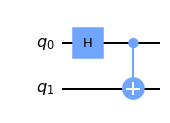

In [5]:
#Visualize 

circ.draw('mpl')

In [6]:
#loading statevector simulator

backend = Aer.get_backend('statevector_simulator')

In [7]:
job = execute(circ, backend)
result = job.result()

In [8]:
outputstate = result.get_statevector(circ)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


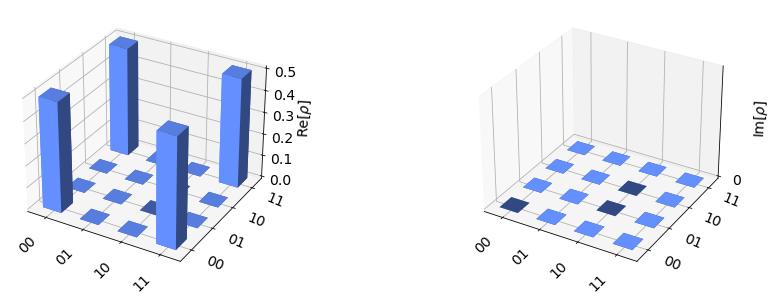

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

#plots the density matrices for better visualization

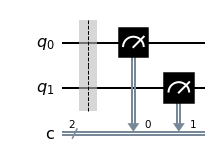

In [10]:
#OpenQASM simulator simulates measurement probabiliteis
#Adding measurements

meas = QuantumCircuit(2, 2)
meas.barrier(range(2)) #to create a visual division 

#perform measurements
meas.measure(range(2), range(2)) #map results from quantum bits to classical bits

meas.draw('mpl')

<ipython-input-11-9ce2ae1380eb>:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = circ+meas
C:\Users\sarth\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


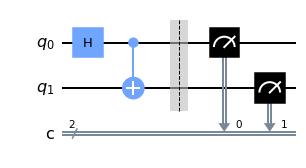

In [11]:
#combining the 2 circuits
qc = circ+meas

qc.draw('mpl')

In [12]:
#Simulating the measurement

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots = 1024)
result_sim = job_sim.result()

In [13]:
#measuremnt results give counts (from shots) that resulted in different states

counts = result_sim.get_counts(qc)
print(counts)

{'00': 513, '11': 511}


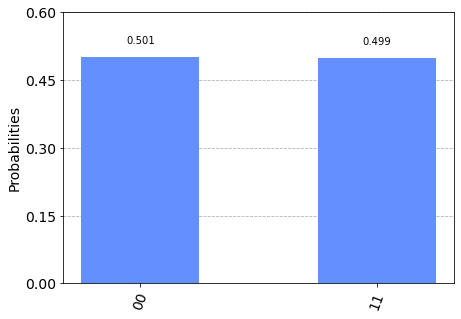

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [15]:
#running on real quantum hardware
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub = "ibm-q")
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (3) and 
                                      not x.configuration().simulator and x.status().operational == True))

print(backend)

ibmqfactory.load_account:WARNING:2021-04-14 14:33:50,342: Credentials are already in use. The existing account in the session will be replaced.


ibmq_belem


In [18]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval = 2)

<ipython-input-18-be50450b48db>:6: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


In [19]:
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'00': 525, '01': 27, '10': 19, '11': 453}


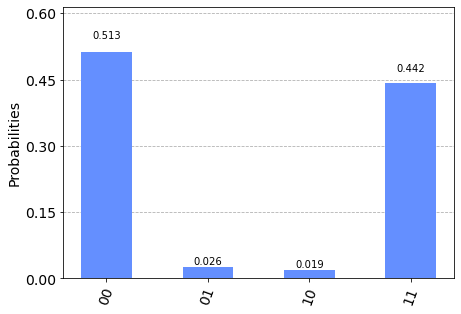

In [20]:
plot_histogram(counts)